Meteorites in France from 1492 to 2014

Data taken from www.lpi.usra.edu on March 25 2022 

In [94]:
import urllib
import pandas as pd
import seaborn as sns

In [95]:
#The data for France comes from the following link
original_path = "https://www.lpi.usra.edu/meteor/metbull.php?sea=%2A&sfor=names&ants=&nwas=&falls=&valids=&stype=contains&lrec=50&map=ge&browse=&country=France&srt=name&categ=All&mblist=All&rect=&phot=&strewn=&snew=0&pnt=Normal%20table&dr=&page=1"

In [96]:
# I created an html file with just the needed data (for speed)
file4 = "meteori-1-2.html" 

In [97]:
table = pd.read_html(file4)

In [98]:
table = table[0]


In [99]:
table.head()

,0,1,2,3,4,5,6,7,8,9
0,Agen **,Official,Y,1814,"Aquitaine, France",H5,30 kg,NaN,"(44.427176, 0.498226)",NaN
1,Aire-sur-la-Lys **,Official,Y,1769,"Nord-Pas-de-Calais, France",Unknown,6.8 kg,NaN,"(50.609061, 2.486308)",NaN
2,Alais **,Official,Y,1806,"Languedoc-Roussillon, France",CI1,6 kg,NaN,"(44.057056, 4.184386)",NaN
3,Alby sur Chéran **,Official,Y,2002,"Rhone-Alpes, France",Eucrite-mmict,252 g,88.0,"(45.818611, 6.001111)",NaN
4,Angers **,Official,Y,1822,"Pays de la Loire, France",L6,1007 g,NaN,"(47.466670, -0.550000)",NaN


In [100]:

table.duplicated().sum()

40

In [101]:
table[8].value_counts(dropna=False)

(46.633330, 0.166670)       2
(43.500000, 6.000000)       2
(43.883330, 1.383330)       2
(49.033330, -1.433330)      2
(-21.733330, 165.900000)    2
                           ..
(47.500000, 7.316670)       1
(44.383330, 2.816670)       1
(46.250000, -1.100000)      1
(48.154597, 6.588658)       1
(47.700000, 1.066670)       1
Name: 8, Length: 89, dtype: int64

In [102]:
table = table.drop_duplicates()
print(len(table))

89


In [103]:
table.rename(columns={0: 'Name', 1: 'Status', 2: 'Fall', 3: 'Year', 4: 'Place', 
                5: 'Type', 6: 'Mass_str', 7: 'MetBull', 8: '(Lat,Long)', 9: 'Notes' }, inplace=True)
print(table.head())  


                 Name    Status Fall  Year                         Place  \
0             Agen **  Official    Y  1814             Aquitaine, France   
1  Aire-sur-la-Lys **  Official    Y  1769    Nord-Pas-de-Calais, France   
2            Alais **  Official    Y  1806  Languedoc-Roussillon, France   
3  Alby sur Chéran **  Official    Y  2002           Rhone-Alpes, France   
4           Angers **  Official    Y  1822      Pays de la Loire, France   

            Type Mass_str  MetBull              (Lat,Long) Notes  
0             H5    30 kg      NaN   (44.427176, 0.498226)   NaN  
1        Unknown   6.8 kg      NaN   (50.609061, 2.486308)   NaN  
2            CI1     6 kg      NaN   (44.057056, 4.184386)   NaN  
3  Eucrite-mmict    252 g     88.0   (45.818611, 6.001111)   NaN  
4             L6   1007 g      NaN  (47.466670, -0.550000)   NaN  


In [104]:
table["Units"] = table["Mass_str"].str.extract(r'( +\w+$)')
table["Units"].value_counts(dropna=False)


 kg    50
 g     31
NaN     8
Name: Units, dtype: int64

In [105]:
table[table["Units"].isnull()]  

,Name,Status,Fall,Year,Place,Type,Mass_str,MetBull,"(Lat,Long)",Notes,Units
14,Carpentras,Doubtful,Y,1738,"Provence-Alpes-Cote d'Azur, France",Doubtful meteorite,NaN,NaN,"(44.050000, 5.050000)",NaN,NaN
22,Cormeilles,Pseudo,NaN,NaN,"Ile-del-France, France",Pseudometeorite,NaN,NaN,"(48.983330, 2.216670)",NaN,NaN
31,Grazac,Pseudo,Y,1885,"Auvergne, France",Pseudometeorite,NaN,NaN,"(45.183330, 4.283330)",NaN,NaN
33,Hautes Alpes,Pseudo,NaN,NaN,France,Pseudometeorite,NaN,NaN,NaN,NaN,NaN
46,Langeac,Pseudo,Y,NaN,"Auvergne, France",Pseudometeorite,NaN,NaN,"(45.100000, 3.516670)",NaN,NaN
51,Limousin,Doubtful,Y,1540,"Limousin, France",Doubtful meteorite,NaN,NaN,"(45.600000, 1.500000)",NaN,NaN
64,Nicorps,Official,Y,1750,"Basse-Normandie, France",Stone-uncl,NaN,NaN,"(49.033330, -1.433330)",NaN,NaN
70,Rochechouart **,Crater,NaN,201 Â± 2 Ma,"Limousin, France",Impact Crater,NaN,NaN,"(45.833330, 0.933330)",From EIDB,NaN


In [106]:
table["Status"].value_counts()

Official       76
Doubtful        5
Pseudo          5
Discredited     2
Crater          1
Name: Status, dtype: int64

In [107]:
table = table.dropna(subset=["Units"])
table.head()

,Name,Status,Fall,Year,Place,Type,Mass_str,MetBull,"(Lat,Long)",Notes,Units
0,Agen **,Official,Y,1814,"Aquitaine, France",H5,30 kg,NaN,"(44.427176, 0.498226)",NaN,kg
1,Aire-sur-la-Lys **,Official,Y,1769,"Nord-Pas-de-Calais, France",Unknown,6.8 kg,NaN,"(50.609061, 2.486308)",NaN,kg
2,Alais **,Official,Y,1806,"Languedoc-Roussillon, France",CI1,6 kg,NaN,"(44.057056, 4.184386)",NaN,kg
3,Alby sur Chéran **,Official,Y,2002,"Rhone-Alpes, France",Eucrite-mmict,252 g,88.0,"(45.818611, 6.001111)",NaN,g
4,Angers **,Official,Y,1822,"Pays de la Loire, France",L6,1007 g,NaN,"(47.466670, -0.550000)",NaN,g


In [108]:
table["Mass"] = table["Mass_str"].str.extract(r'(^\d+)')
table.head()

,Name,Status,Fall,Year,Place,Type,Mass_str,MetBull,"(Lat,Long)",Notes,Units,Mass
0,Agen **,Official,Y,1814,"Aquitaine, France",H5,30 kg,NaN,"(44.427176, 0.498226)",NaN,kg,30
1,Aire-sur-la-Lys **,Official,Y,1769,"Nord-Pas-de-Calais, France",Unknown,6.8 kg,NaN,"(50.609061, 2.486308)",NaN,kg,6
2,Alais **,Official,Y,1806,"Languedoc-Roussillon, France",CI1,6 kg,NaN,"(44.057056, 4.184386)",NaN,kg,6
3,Alby sur Chéran **,Official,Y,2002,"Rhone-Alpes, France",Eucrite-mmict,252 g,88.0,"(45.818611, 6.001111)",NaN,g,252
4,Angers **,Official,Y,1822,"Pays de la Loire, France",L6,1007 g,NaN,"(47.466670, -0.550000)",NaN,g,1007


In [109]:
x = table[table["Units"] == ' g']
x.head()

,Name,Status,Fall,Year,Place,Type,Mass_str,MetBull,"(Lat,Long)",Notes,Units,Mass
3,Alby sur Chéran **,Official,Y,2002,"Rhone-Alpes, France",Eucrite-mmict,252 g,88.0,"(45.818611, 6.001111)",NaN,g,252
4,Angers **,Official,Y,1822,"Pays de la Loire, France",L6,1007 g,NaN,"(47.466670, -0.550000)",NaN,g,1007
6,Asco **,Official,Y,1805,"Corse, France",H6,41 g,NaN,"(42.450000, 9.033330)",NaN,g,41
7,Aubres **,Official,Y,1836,"Rhone-Alpes, France",Aubrite,800 g,NaN,"(44.383330, 5.166670)",NaN,g,800
10,Bacqueville **,Official,NaN,1999,"Haute-Normandie, France",H6,395 g,87.0,"(49.326472, 1.355106)",NaN,g,395


In [110]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 88
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        81 non-null     object 
 1   Status      81 non-null     object 
 2   Fall        66 non-null     object 
 3   Year        81 non-null     object 
 4   Place       81 non-null     object 
 5   Type        81 non-null     object 
 6   Mass_str    81 non-null     object 
 7   MetBull     19 non-null     float64
 8   (Lat,Long)  81 non-null     object 
 9   Notes       1 non-null      object 
 10  Units       81 non-null     object 
 11  Mass        81 non-null     object 
dtypes: float64(1), object(11)
memory usage: 8.2+ KB


In [111]:
table['Mass'] = table['Mass'].astype(float)
table['Mass'].describe()

count      81.000000
mean      244.740741
std       418.257868
min         2.000000
25%         6.000000
50%        37.000000
75%       277.000000
max      1820.000000
Name: Mass, dtype: float64

In [112]:
table['Mass_kg'] = table['Mass'].where(table['Units'] == ' kg', table['Mass']/1000)
table['Mass_kg'].describe()

count     81.000000
mean      33.409074
std       99.578079
min        0.019000
25%        0.780000
50%        4.000000
75%       14.000000
max      626.000000
Name: Mass_kg, dtype: float64

In [113]:
table[table['Mass'] > 1].sort_values(by='Mass_kg')

,Name,Status,Fall,Year,Place,Type,Mass_str,MetBull,"(Lat,Long)",Notes,Units,Mass,Mass_kg
34,Henvic **,Official,NaN,1991,"Bretagne, France",L5,19 g,73.0,"(48.650000, -3.916670)",NaN,g,19.0,0.019
6,Asco **,Official,Y,1805,"Corse, France",H6,41 g,NaN,"(42.450000, 9.033330)",NaN,g,41.0,0.041
21,Contis-Plage **,Official,NaN,2000,"Aquitaine, France",H5,44 g,101.0,"(44.083330, -1.316670)",NaN,g,44.0,0.044
20,Clohars **,Official,Y,1822,France,L4,48.6 g,NaN,"(47.890000, -4.060000)",Coordinates approximate,g,48.0,0.048
32,Groslée,Pseudo,NaN,1827,"Rhone-Alpes, France",Pseudometeorite,52 g,NaN,"(45.700000, 5.616670)",NaN,g,52.0,0.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Montferré **,Official,Y,1923,"Languedoc-Roussillon, France",H5,149 kg,51.0,"(43.390560, 1.962500)",NaN,kg,149.0,149.000
85,Saint-Séverin **,Official,Y,1966,"Poitou-Charentes, France",LL6,271 kg,40.0,"(45.300000, 0.233330)",NaN,kg,271.0,271.000
58,Mont Dieu **,Official,NaN,1994,"Champagne-Ardenne, France","Iron, ungrouped",360 kg,81.0,"(49.550000, 4.866670)",NaN,kg,360.0,360.000
71,Saint-Aubin **,Official,NaN,1968,"Champagne-Ardenne, France","Iron, IIIAB",472 kg,87.0,"(48.483330, 3.583330)",NaN,kg,472.0,472.000


In [114]:
table['Year'] = table['Year'].astype('int32')
table['Year'].describe()

count      81.000000
mean     1865.716049
std        88.891962
min      1492.000000
25%      1822.000000
50%      1856.000000
75%      1923.000000
max      2014.000000
Name: Year, dtype: float64

In [115]:
bins = [1400, 1800, 1900, 2000, 2100 ]
years = pd.cut(table['Year'], bins)
pd.value_counts(years)

(1800, 1900]    49
(1900, 2000]    18
(1400, 1800]     9
(2000, 2100]     5
Name: Year, dtype: int64

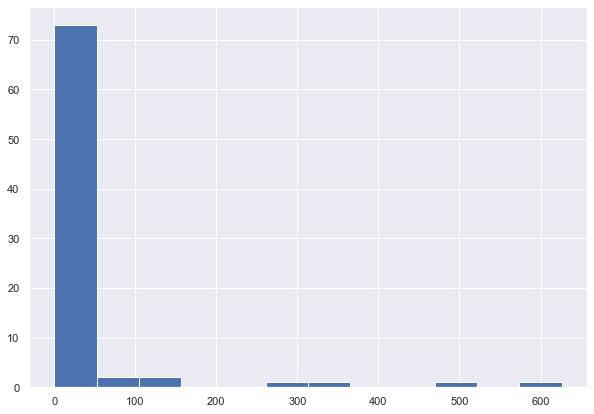

In [116]:
_ = table['Mass_kg'].hist(bins= 12, figsize=(10, 7))

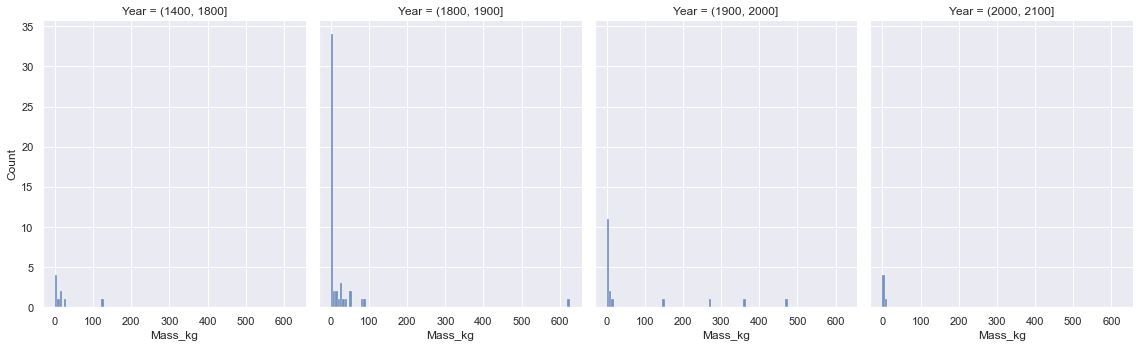

In [117]:
columns = ["Mass_kg"]
sns.set_theme(style="darkgrid")


sns.displot(
    table, x ="Mass_kg", col=years, height=5, aspect=.8) 
    
